In [22]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [23]:
df = pd.read_csv('./CCLE_depMap_18Q4_TPM_v2.csv', index_col=0)
df = df.loc[:, df.any()]

In [21]:
df

,TSPAN6 (ENSG00000000003),TNMD (ENSG00000000005),DPM1 (ENSG00000000419),SCYL3 (ENSG00000000457),C1orf112 (ENSG00000000460),FGR (ENSG00000000938),CFH (ENSG00000000971),FUCA2 (ENSG00000001036),GCLC (ENSG00000001084),NFYA (ENSG00000001167),...,RP11-126K1.9 (ENSG00000273481),RP4-671G15.2 (ENSG00000273483),OR6R2P (ENSG00000273484),RP11-225H22.7 (ENSG00000273485),RP11-731C17.2 (ENSG00000273486),RP4-621B10.8 (ENSG00000273487),RP11-114I8.4 (ENSG00000273488),RP11-180C16.1 (ENSG00000273489),AP000230.1 (ENSG00000273492),RP11-80H18.4 (ENSG00000273493)
ACH-001270,3.976364,0.0,6.835798,1.959770,3.872829,0.070389,0.070389,5.437294,3.599318,3.468583,...,0.000000,0.189034,0.0,0.641546,0.659925,0.028569,0.790772,2.974529,0.000000,0.000000
ACH-001001,5.437627,0.0,7.325350,1.765535,3.739848,0.014355,0.687061,5.397803,4.416164,3.451541,...,0.150560,0.400538,0.0,0.454176,0.070389,0.028569,0.731183,2.021480,0.070389,0.000000
ACH-000956,2.650765,0.0,6.216843,3.427606,4.672991,0.014355,0.111031,5.803744,6.900867,5.287251,...,0.495695,0.910733,0.0,0.443607,1.555816,0.250962,2.432959,3.174726,0.014355,0.000000
ACH-000948,3.001802,0.0,6.781229,4.150560,3.839960,0.000000,0.298658,7.425510,6.554589,4.295723,...,0.000000,0.356144,0.0,0.000000,0.748461,0.070389,1.570463,3.065228,0.111031,0.000000
ACH-000026,4.572890,0.0,5.845741,1.839960,3.568032,0.000000,0.084064,4.990047,4.533563,3.938286,...,0.000000,0.333424,0.0,0.084064,0.641546,0.042644,1.063503,2.341986,0.137504,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-000630,5.613532,0.0,6.912889,2.599318,3.403268,0.042644,0.137504,6.865671,5.362119,4.464668,...,0.000000,0.226509,0.0,1.189034,0.765535,0.000000,2.160275,1.786596,0.000000,0.000000
ACH-000469,4.903038,0.0,6.024364,2.570463,3.842979,0.286881,7.133810,6.897119,3.860963,4.762880,...,0.000000,0.000000,0.0,0.000000,1.130931,0.000000,0.000000,2.833902,0.000000,0.000000
ACH-000570,5.956057,0.0,6.783064,2.788686,4.201634,0.176323,5.761551,6.553975,4.590362,5.096768,...,0.137504,0.378512,0.0,0.378512,1.111031,0.124328,1.560715,3.008989,0.097611,0.000000
ACH-000097,3.189034,0.0,7.131651,4.084064,4.205549,0.084064,1.157044,4.375039,4.417515,3.751678,...,0.000000,0.000000,0.0,0.985500,1.761285,0.000000,3.119356,2.097611,0.028569,0.000000


In [24]:
df2 = pd.read_csv('./CCLE_depMap_18Q4_TPM_v2.csv')

In [48]:
# Standardize the features (important for PCA)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Apply PCA
pca = PCA(n_components=50)  # Choose the number of components
#principal_components = pca.fit_transform(scaled_data)
out = pca.fit(scaled_data)

# Create a DataFrame with the principal components
pc_df = pd.DataFrame(data=principal_components)#, columns=['PC1', 'PC2'])

#print(pc_df)

pc_df.index = df2['Unnamed: 0']
pc_df.to_csv('./pca22.csv')

In [49]:
var = out.explained_variance_ratio_

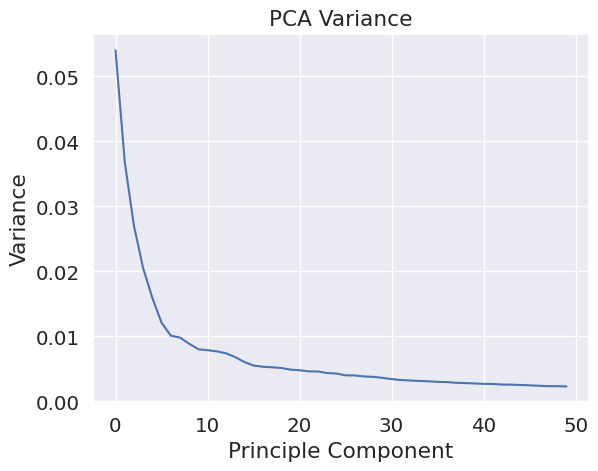

In [50]:
import matplotlib.pyplot as plt

plt.plot(var)
plt.title("PCA Variance")
plt.ylabel("Variance")
plt.xlabel("Principle Component")
plt.savefig('pca_variance_50.png', bbox_inches='tight', dpi=300)